<a href="https://colab.research.google.com/github/NatSama2/Bootcamp-Analisis-de-Datos/blob/main/Modulo-4/analisis_datos_valores_perdidos_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Análisis de Datos: Valores Faltantes y Outliers

Este notebook explora conceptos fundamentales para el análisis de datos, incluyendo la detección y tratamiento de valores faltantes y valores atípicos (outliers).


## 1. Introducción al análisis de datos

El análisis de datos es una herramienta clave en la toma de decisiones dentro de una organización. Permite extraer información útil, descubrir patrones y respaldar decisiones estratégicas.

**Problemas comunes:**
- Valores faltantes
- Datos incorrectos o inconsistentes
- Outliers (valores atípicos)


## 2. Valores Perdidos

### ¿Qué son?
Observaciones sin información en una o varias variables, generadas por errores en la recolección, almacenamiento o captura de datos.


### 2.1 Identificación de valores perdidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
survived         0
pclass           0
sex              0
age            177
sib

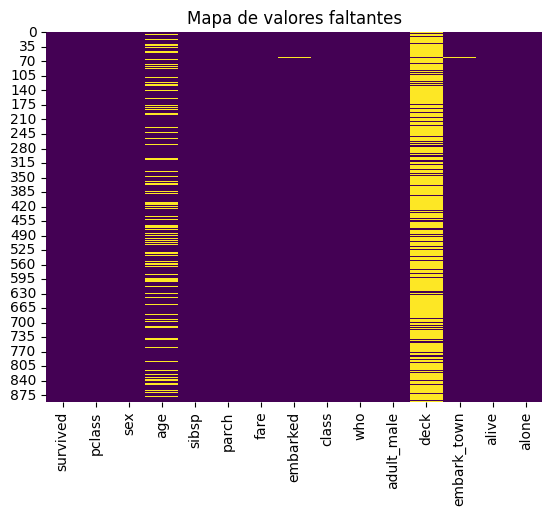

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset de ejemplo
df = sns.load_dataset('titanic')

# Resumen general
df.info()

# Cantidad de valores nulos por columna
print(df.isnull().sum())

# Visualización con heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores faltantes")
plt.show()


### 2.2 Filtrado de valores perdidos

In [28]:
# Eliminar filas con valores faltantes
df_valores_faltantes = df.dropna()

# Eliminar columnas con demasiados valores nulos
df_thresh = df.dropna(axis=1, thresh=500)

df_valores_faltantes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### 2.3 Imputación de valores perdidos

In [29]:
# Imputación numérica con la media
df['age'] = df['age'].fillna(df['age'].mean())

# Imputación categórica con la moda
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df[['age', 'embarked']].isnull().sum()

,0
age,0
embarked,0


## 3. Outliers o Valores Atípicos

### ¿Qué son?
Valores que están significativamente alejados del resto de los datos y pueden afectar el análisis.


### 3.1 Detección de Outliers

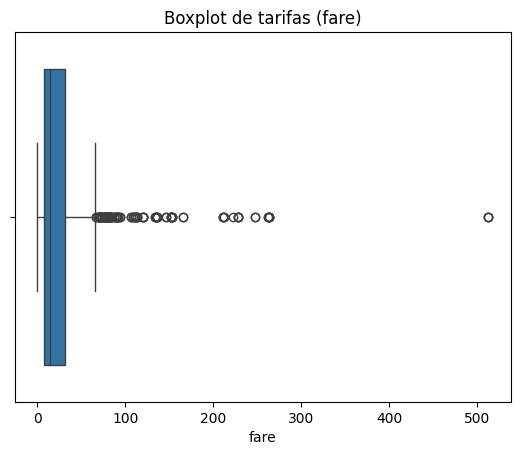

In [30]:
# Boxplot para detectar outliers
sns.boxplot(x=df['fare'])
plt.title("Boxplot de tarifas (fare)")
plt.show()

In [31]:
# Método IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lim_inf) | (df['fare'] > lim_sup)]
print(f"Número de outliers: {outliers.shape[0]}")

outliers

Número de outliers: 116


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.000000,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.000000,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,29.699118,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,29.699118,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.000000,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


### 3.2 Tratamiento de Outliers

In [32]:
# Opción 1: Eliminarlos
df_no_outliers = df[(df['fare'] >= lim_inf) & (df['fare'] <= lim_sup)]

# Opción 2: Reemplazarlos
df['fare'] = df['fare'].apply(lambda x: df['fare'].median() if x > lim_sup else x)

In [33]:
# Método IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lim_inf) | (df['fare'] > lim_sup)]
print(f"Número de outliers: {outliers.shape[0]}")

outliers

Número de outliers: 48


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
35,0,1,male,42.000000,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False
54,0,1,male,65.000000,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
74,1,3,male,32.000000,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
92,0,1,male,46.000000,1,0,61.1750,S,First,man,True,E,Southampton,no,False
97,1,1,male,23.000000,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
110,0,1,male,47.000000,0,0,52.0000,S,First,man,True,C,Southampton,no,True
137,0,1,male,37.000000,1,0,53.1000,S,First,man,True,C,Southampton,no,False
155,0,1,male,51.000000,0,1,61.3792,C,First,man,True,NaN,Cherbourg,no,False


In [34]:
lim_inf, lim_sup

(np.float64(-16.449), np.float64(48.5094))

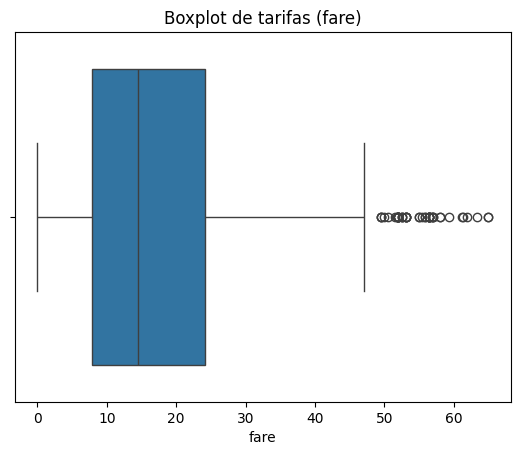

In [35]:
# Boxplot para detectar outliers
sns.boxplot(x=df['fare'])
plt.title("Boxplot de tarifas (fare)")
plt.show()

## 4. Ejercicios

1. Cargar el dataset `penguins` de seaborn y detectar valores perdidos.
2. Imputar la edad faltante del dataset Titanic con la mediana.
3. Eliminar outliers de la columna `fare` usando el método IQR.


In [36]:
# Cargar el dataset penguins de seaborn y detectar valores perdidos.

import seaborn as sns

df = sns.load_dataset('penguins')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
